In [1]:
source("./enrichment_functions.R")

Loading required package: pacman



[1] "###################################"
[1] "Total inflam Signature: 10774"
[1] "inflam Signature Union: 4639"
[1] "inflam Signature Recurrent: 2058"
[1] "###################################"
[1] "Total Stress Signature: 12603"
[1] "Stress Signature Union: 5053"
[1] "Stress Signature Recurrent: 2142"
[1] "Stress Signature Unique: 116"
[1] "###################################"
[1] "Total Wound Signature: 2584"
[1] "Wound Signature Union: 997"
[1] "Wound Signature Recurrent: 521"
[1] "Wound Healing Signature Unique: 28"
[1] "###################################"
[1] "Total Regen Signature: 642"
[1] "Regen Signature Union: 228"
[1] "Regen Signature Recurrent: 189"
[1] "Regeneration Signature Unique: 20"
[1] "Total H Gene Set Genes: 40755"
[1] "Total Available H Gene Set Genes: 39144"
[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datasets :

Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_0_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_30_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_up, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_90_TRIM_60_upregulated.txt' has size 0. Returning a NULL data.table.”


[1] "xlaevis_wound upregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.10874439461883"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 15"
[1] "################################################"
[1] "xlaevis_wound downregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 2.80962343096234"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 9"
[1] "################################################"
[1] "xlaevis_wound upregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.978"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 15"
[1] "################################################"
[1] "xlaevis_wound downregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.548"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 9"
[1] "##########################

Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_0_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_30_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_up, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_90_TRIM_60_upregulated.txt' has size 0. Returning a NULL data.table.”


[1] "wound upregulated"
[1] "wound total_datasets : 151"
[1] "wound mean reccurence : 11.625"
[1] "wound min reccurence : 7"
[1] "wound max reccurence : 44"
[1] "################################################"
[1] "wound downregulated"
[1] "wound total_datasets : 151"
[1] "wound mean reccurence : 10.857"
[1] "wound min reccurence : 6"
[1] "wound max reccurence : 49"
[1] "################################################"
[1] "regen upregulated"
[1] "regen total_datasets : 15"
[1] "regen mean reccurence : 3.36936936936937"
[1] "regen min reccurence : 2"
[1] "regen max reccurence : 9"
[1] "################################################"
[1] "regen downregulated"
[1] "regen total_datasets : 15"
[1] "regen mean reccurence : 3.83084577114428"
[1] "regen min reccurence : 2"
[1] "regen max reccurence : 11"
[1] "################################################"
[1] "stress upregulated"
[1] "stress total_datasets : 22"
[1] "stress mean reccurence : 2.686"
[1] "stress min reccurence : 2"
[1] 

In [2]:
options(repr.plot.width=12, repr.plot.height=12)

In [3]:
load(file = "../data/tcgaHazardAndPvalues.Rda")

In [4]:
set.seed(76458)
gene_list <- unlist(combined_recurrent)
hazRat_mat <- matrix(,nrow= length(gene_list), ncol= length(survivalList))
sig_hazRat_mat <- matrix(,nrow= length(gene_list), ncol= length(survivalList))

In [5]:
gene_list <- unlist(combined_recurrent)
final_mat <- numeric(length(gene_list))
names(final_mat) <- names(gene_list)
cols <- 2
for(j in 1:length(survivalList)) {
    no_na <- na.omit(survivalList[[j]])
    sig_dat <- no_na[no_na$HR < 5 & no_na$HR > -5,]
    if(nrow(sig_dat) > 1 & (sum(gene_list %in% rownames(sig_dat)) > 1)) {
        new_vec <- numeric(length(gene_list))
        
        for(i in 1:length(gene_list)) {
            if(gene_list[i] %in% rownames(sig_dat)) {
                if(sig_dat$Pvalue[rownames(sig_dat) == gene_list[i]][1] < .05) {
                    new_vec[i] <- sig_dat$HR[rownames(sig_dat) == gene_list[i]][1]
                } else {
                    new_vec[i] <- 0
                }
            } else  {
                new_vec[i] <- 0
            }
        }
        
        final_mat  <- cbind(final_mat, new_vec)
        colnames(final_mat)[cols] <- names(survivalList)[j]
        cols <- cols + 1
    }
}
dim(final_mat)

[1] 8852   21

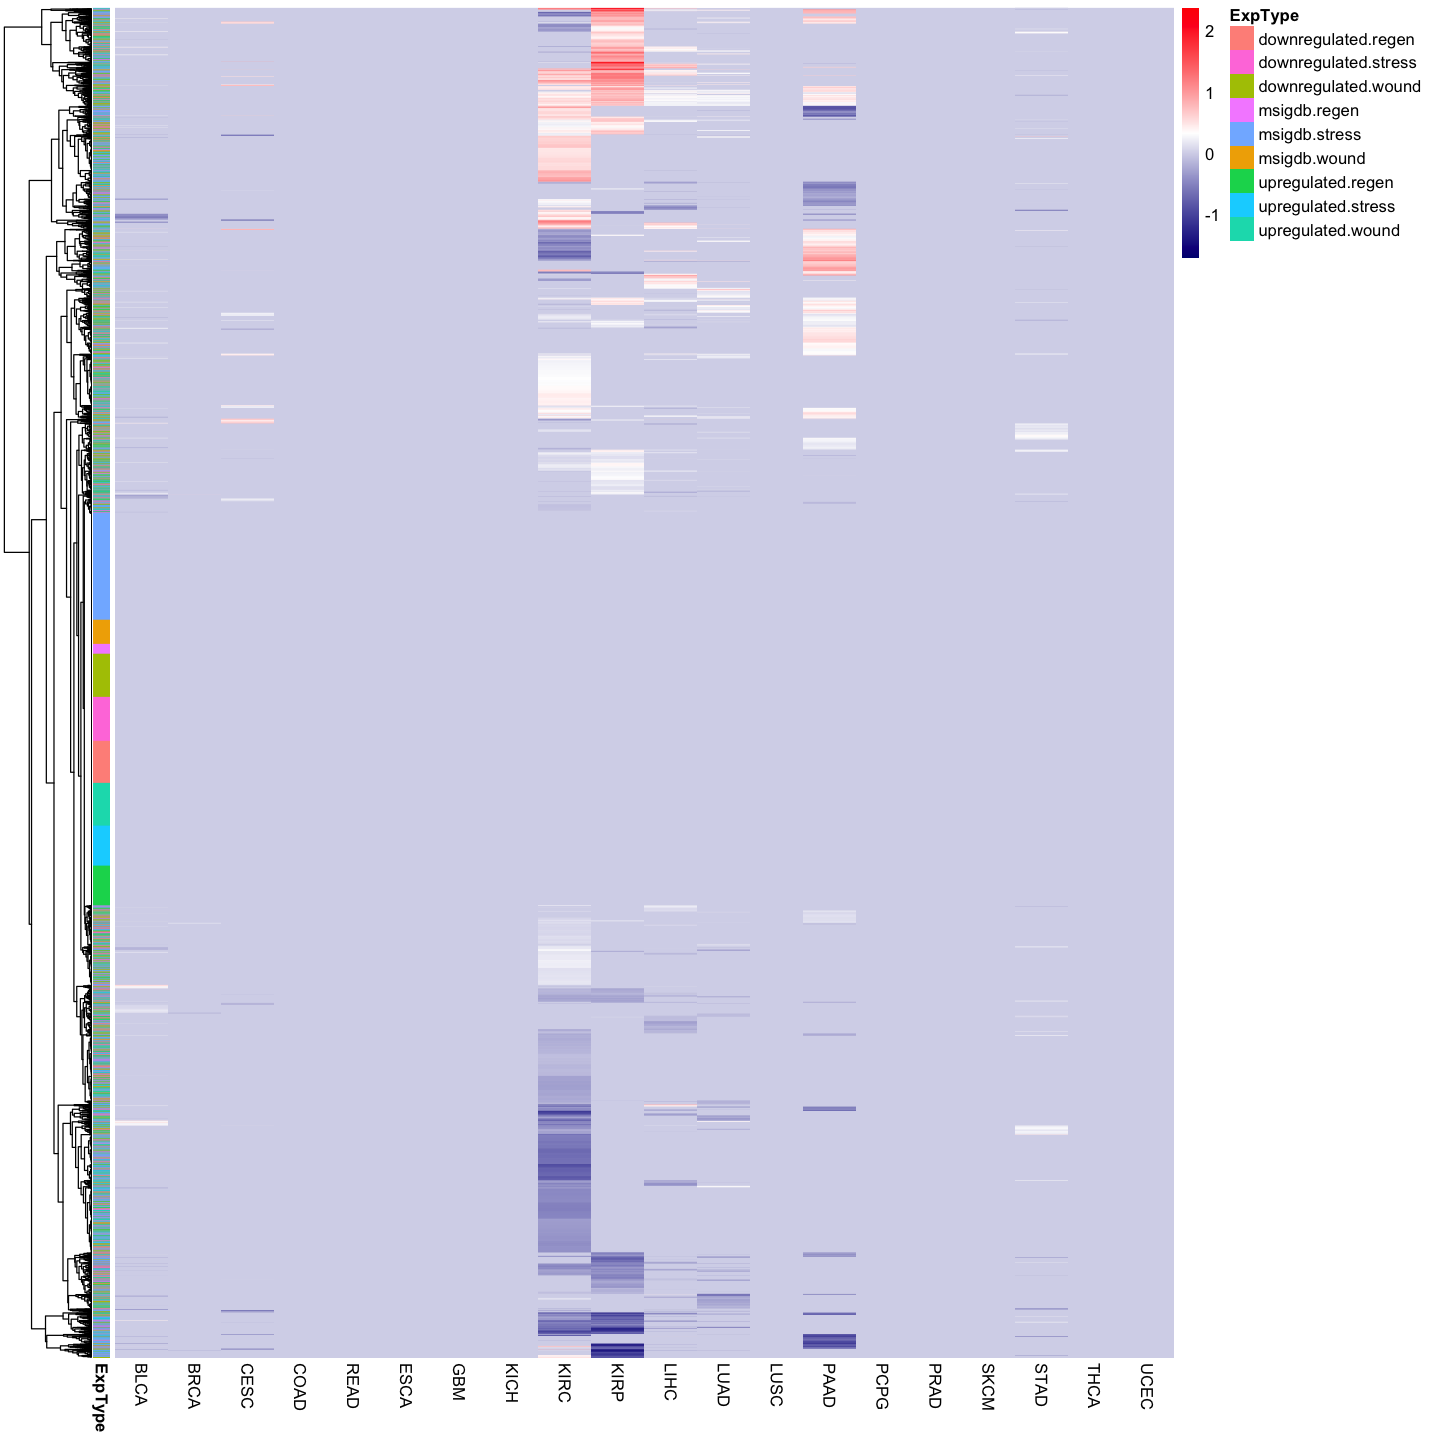

In [6]:
row_labels <- gsub("[0-9]","",names(gene_list))
heatmap_annot <- data.frame("ExpType"=row_labels)
rownames(heatmap_annot) <- names(gene_list)

cutoff.distance <-  0.02
cols <- makeColorRampPalette(c("red", "pink",
                               "lightblue", "navy"),
                             cutoff.distance / max(final_mat[,2:ncol(final_mat)]),
                             500)

heatmap_final_mat <- pheatmap(final_mat[,2:ncol(final_mat)],
                              annotation_row=heatmap_annot,show_rownames = F,
                              cluster_rows=T,cluster_cols=F,
                              color=colorRampPalette(c("navy", "white", "red"))(50000))

In [7]:
lfc_files <- readRDS("../data/lfc_files.RDS")
upregulated_cancer_genes <- lfc_files[["total_up"]]

total_lfc_cancer_genes<- list()
for(i in names(upregulated_cancer_genes)) {
    total_lfc_cancer_genes[i] <- upregulated_cancer_genes[i]
}

summary(upregulated_cancer_genes)

                          Length Class  Mode   
TCGA-OV_vs_Ovary          14412  factor numeric
TCGA-UCS_vs_Uterus        11189  factor numeric
TCGA-UCEC_vs_Uterus       12264  factor numeric
TCGA-BRCA_vs_Breast        8505  factor numeric
TCGA-SKCM_vs_Skin          9894  factor numeric
TCGA-ACC_vs_Adrenal_Gland 10968  factor numeric
TCGA-THCA_vs_Thyroid      10669  factor numeric
TCGA-LUAD_vs_Lung         11410  factor numeric
TCGA-LUSC_vs_Lung         11169  factor numeric
TCGA-PAAD_vs_Pancreas     10331  factor numeric
TCGA-ESCA_vs_Esophagus     4964  factor numeric
TCGA-GBM_vs_Brain          6166  factor numeric
TCGA-STAD_vs_Stomach      11056  factor numeric
TCGA-COAD_vs_Colon         9773  factor numeric
TCGA-PRAD_vs_Prostate     15291  factor numeric
TCGA-TGCT_vs_Testis       14713  factor numeric
TCGA-LIHC_vs_Liver        13542  factor numeric
TCGA-KICH_vs_Kidney       13921  factor numeric
TCGA-KIRC_vs_Kidney        6760  factor numeric
TCGA-KIRP_vs_Kidney       10959  factor 

In [8]:
pos_matrix <- numeric(length(combined_recurrent))
neg_matrix <- numeric(length(combined_recurrent))
signif_matrix <- numeric(length(combined_recurrent))

current_list <- NULL

hr_pos <- list()
for(i in 1:length(survivalList)) {
    no_na <- na.omit(survivalList[[i]])
    sig_dat <- no_na[no_na$HR < 5 & no_na$HR > -5,]
    
    deg_index <- which(gsub('TCGA-','',gsub('_.*','',names(total_lfc_cancer_genes))) == names(survivalList)[i])

    current_list <- combined_recurrent
    
    back_signif_hr <- sig_dat[sig_dat$Pvalue < .05,]
    back_pos_hr <- sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat$HR > 0,]
    back_neg_hr <- sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat < 0,]
    
    pos_fisher_vec <- numeric(length(current_list))
    neg_fisher_vec <- numeric(length(current_list))
    signif_fisher_vec <- numeric(length(current_list))
    
    for(j in 1:length(current_list)){
        current_set <- current_list[[j]]
        current_name <- names(current_list)[j]
        current_foreground_total <- sig_dat[rownames(sig_dat) %in% current_set,]
        
        
        fore_signif_hr <- current_foreground_total[current_foreground_total$Pvalue < .05,]
        fore_pos_hr <- current_foreground_total[current_foreground_total$Pvalue < .05 &
                                                current_foreground_total$HR > 0,]
        fore_neg_hr <- current_foreground_total[current_foreground_total$Pvalue < .05 &
                                                current_foreground_total$HR < 0,]
        
        pos_fisher_contingency = rbind(c(nrow(fore_pos_hr),nrow(current_foreground_total)-nrow(fore_pos_hr)),
                                       c(nrow(back_pos_hr),nrow(sig_dat)-nrow(back_pos_hr)))
        neg_fisher_contingency = rbind(c(nrow(fore_neg_hr),nrow(current_foreground_total)-nrow(fore_neg_hr)),
                                       c(nrow(back_neg_hr),nrow(sig_dat)-nrow(back_neg_hr)))
        significant_fisher_contingency = rbind(c(nrow(fore_signif_hr),nrow(current_foreground_total)-nrow(fore_signif_hr)),
                                               c(nrow(back_signif_hr),nrow(sig_dat)-nrow(back_signif_hr)))
        
        pos_test <- fisher.test(pos_fisher_contingency)
        neg_test <- fisher.test(neg_fisher_contingency)
        significant_test <- fisher.test(significant_fisher_contingency)
        
        
        if(pos_test$p.value < .05) {
            pos_fisher_vec[j] = pos_test$estimate
        } else { pos_fisher_vec[j] = -1}
        if(neg_test$p.value < .05) {
            neg_fisher_vec[j] = neg_test$estimate
        } else { neg_fisher_vec[j] = -1}
        if(significant_test$p.value < .05) {
            signif_fisher_vec[j] = significant_test$estimate
        } else { signif_fisher_vec[j] = -1}
    }
    
    pos_matrix <- cbind(pos_matrix, pos_fisher_vec)
    neg_matrix <- cbind(neg_matrix, neg_fisher_vec)
    signif_matrix <- cbind(signif_matrix, signif_fisher_vec)
    
}

pos_matrix <- pos_matrix[,2:ncol(pos_matrix)]
colnames(pos_matrix) <- names(survivalList)
rownames(pos_matrix) <- names(current_list)
pos_matrix <- t(pos_matrix)

neg_matrix <- neg_matrix[,2:ncol(neg_matrix)]
colnames(neg_matrix) <- names(survivalList)
rownames(neg_matrix) <- names(current_list)
neg_matrix <- t(neg_matrix)

signif_matrix <- signif_matrix[,2:ncol(signif_matrix)]
colnames(signif_matrix) <- names(survivalList)
rownames(signif_matrix) <- names(current_list)
signif_matrix <- t(signif_matrix)

In [9]:
neg_matrix

,upregulated.regen,upregulated.stress,upregulated.wound,downregulated.regen,downregulated.stress,downregulated.wound,msigdb.regen,msigdb.wound,msigdb.stress
BLCA,-1.0000000,-1.0000000,-1.0000000,0.3601504,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
BRCA,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
CESC,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
COAD,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
READ,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
ESCA,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
GBM,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
KICH,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1,-1.0000000,-1.0000000
KIRC,-1.0000000,1.5747586,1.3630131,-1.0000000,1.599076,-1.0000000,-1,-1.0000000,1.1493874
KIRP,-1.0000000,-1.0000000,-1.0000000,0.6740959,1.476450,0.4866896,-1,0.5811079,0.6597569


In [10]:
row_labels_hr <- factor(gsub("^.*\\.","",names(current_list)))
levels(row_labels_hr) <- c("RG", "SR", "WH")
heatmap_annot_hr <- data.frame("Experiment_Type"=row_labels_hr)
rownames(heatmap_annot_hr) <- names(current_list)

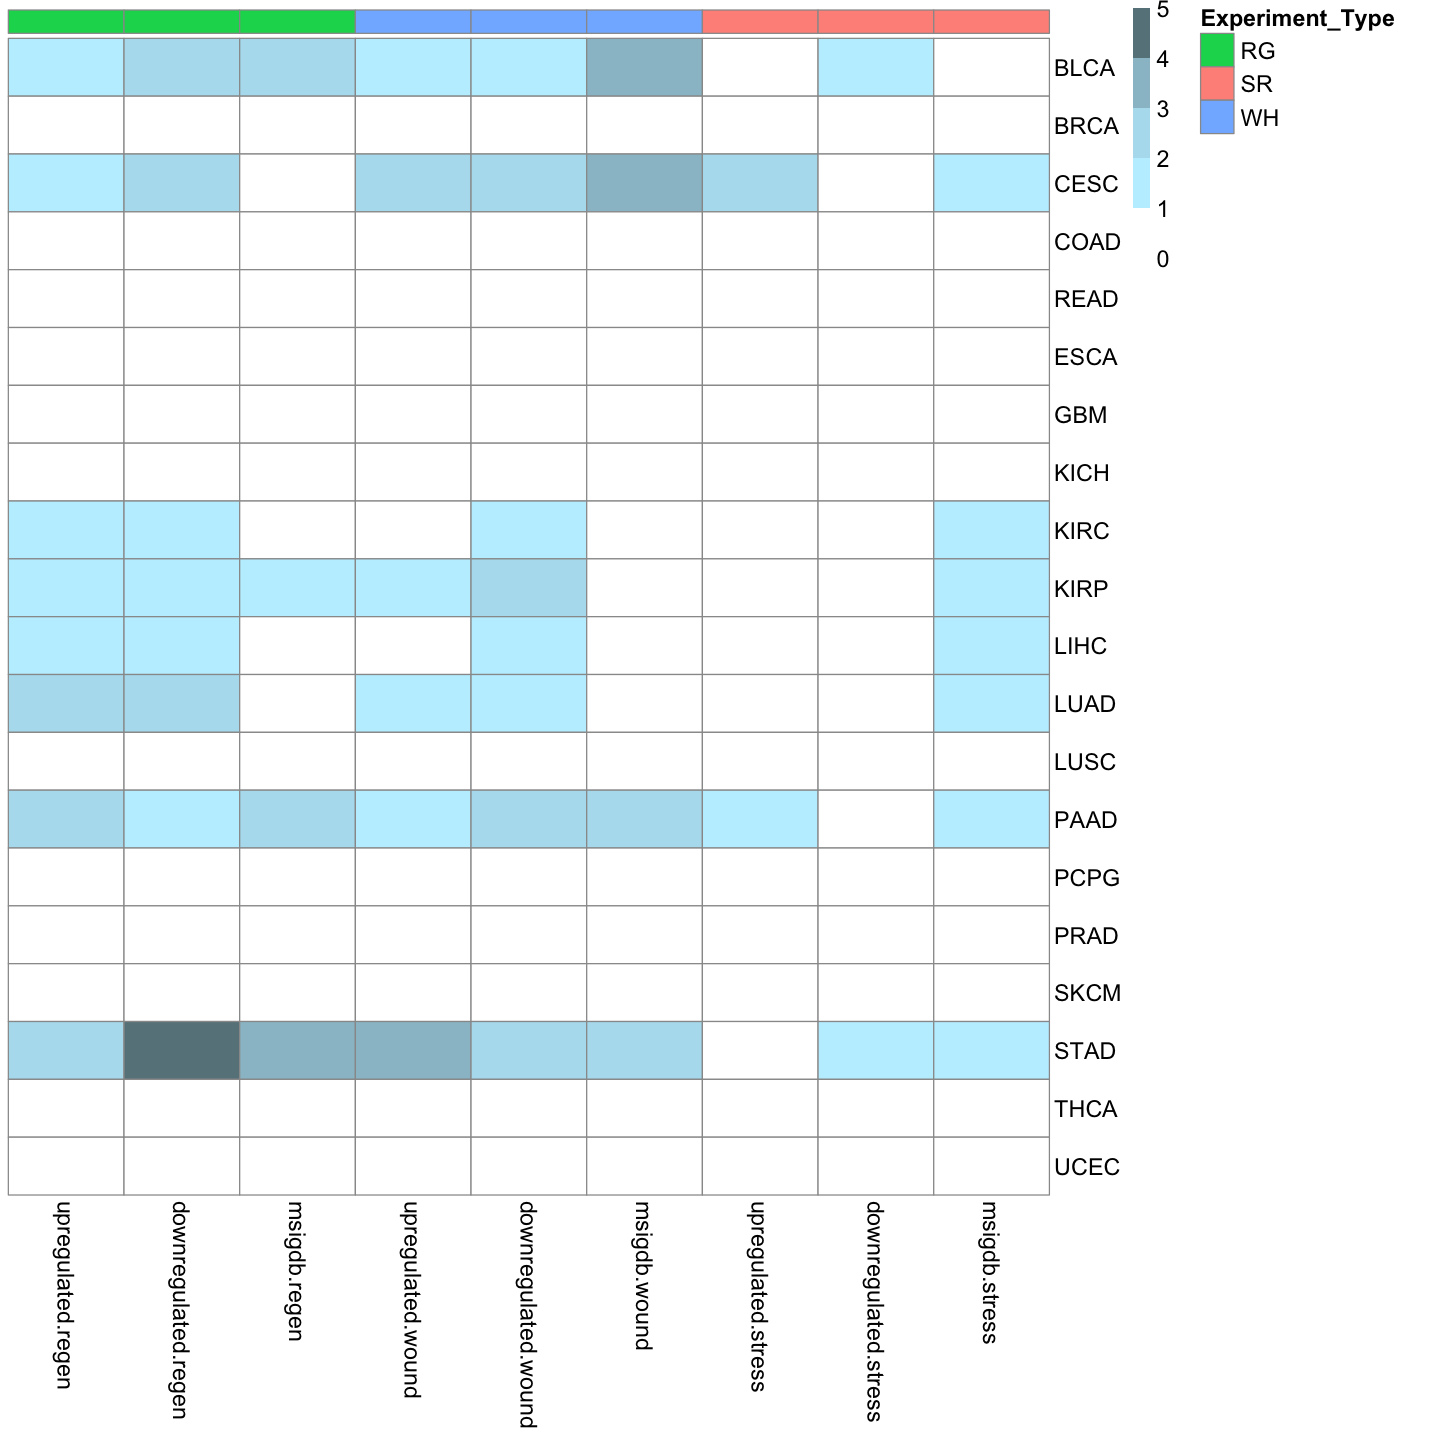

In [11]:
options(repr.plot.width=12, repr.plot.height=12)

pheatmap(pos_matrix[,c('upregulated.regen','downregulated.regen', 'msigdb.regen',
                       'upregulated.wound','downregulated.wound','msigdb.wound',
                       'upregulated.stress','downregulated.stress','msigdb.stress')],
         annotation_col=heatmap_annot_hr, annotation_names_col = F,
         color = colorRampPalette(c("white",'lightblue1',"lightblue2", "lightblue3", "lightblue4"))(5),
         fontsize = 14,
         breaks = c(0, 1, 2, 3, 4, 5),cluster_rows=F, cluster_cols=F)


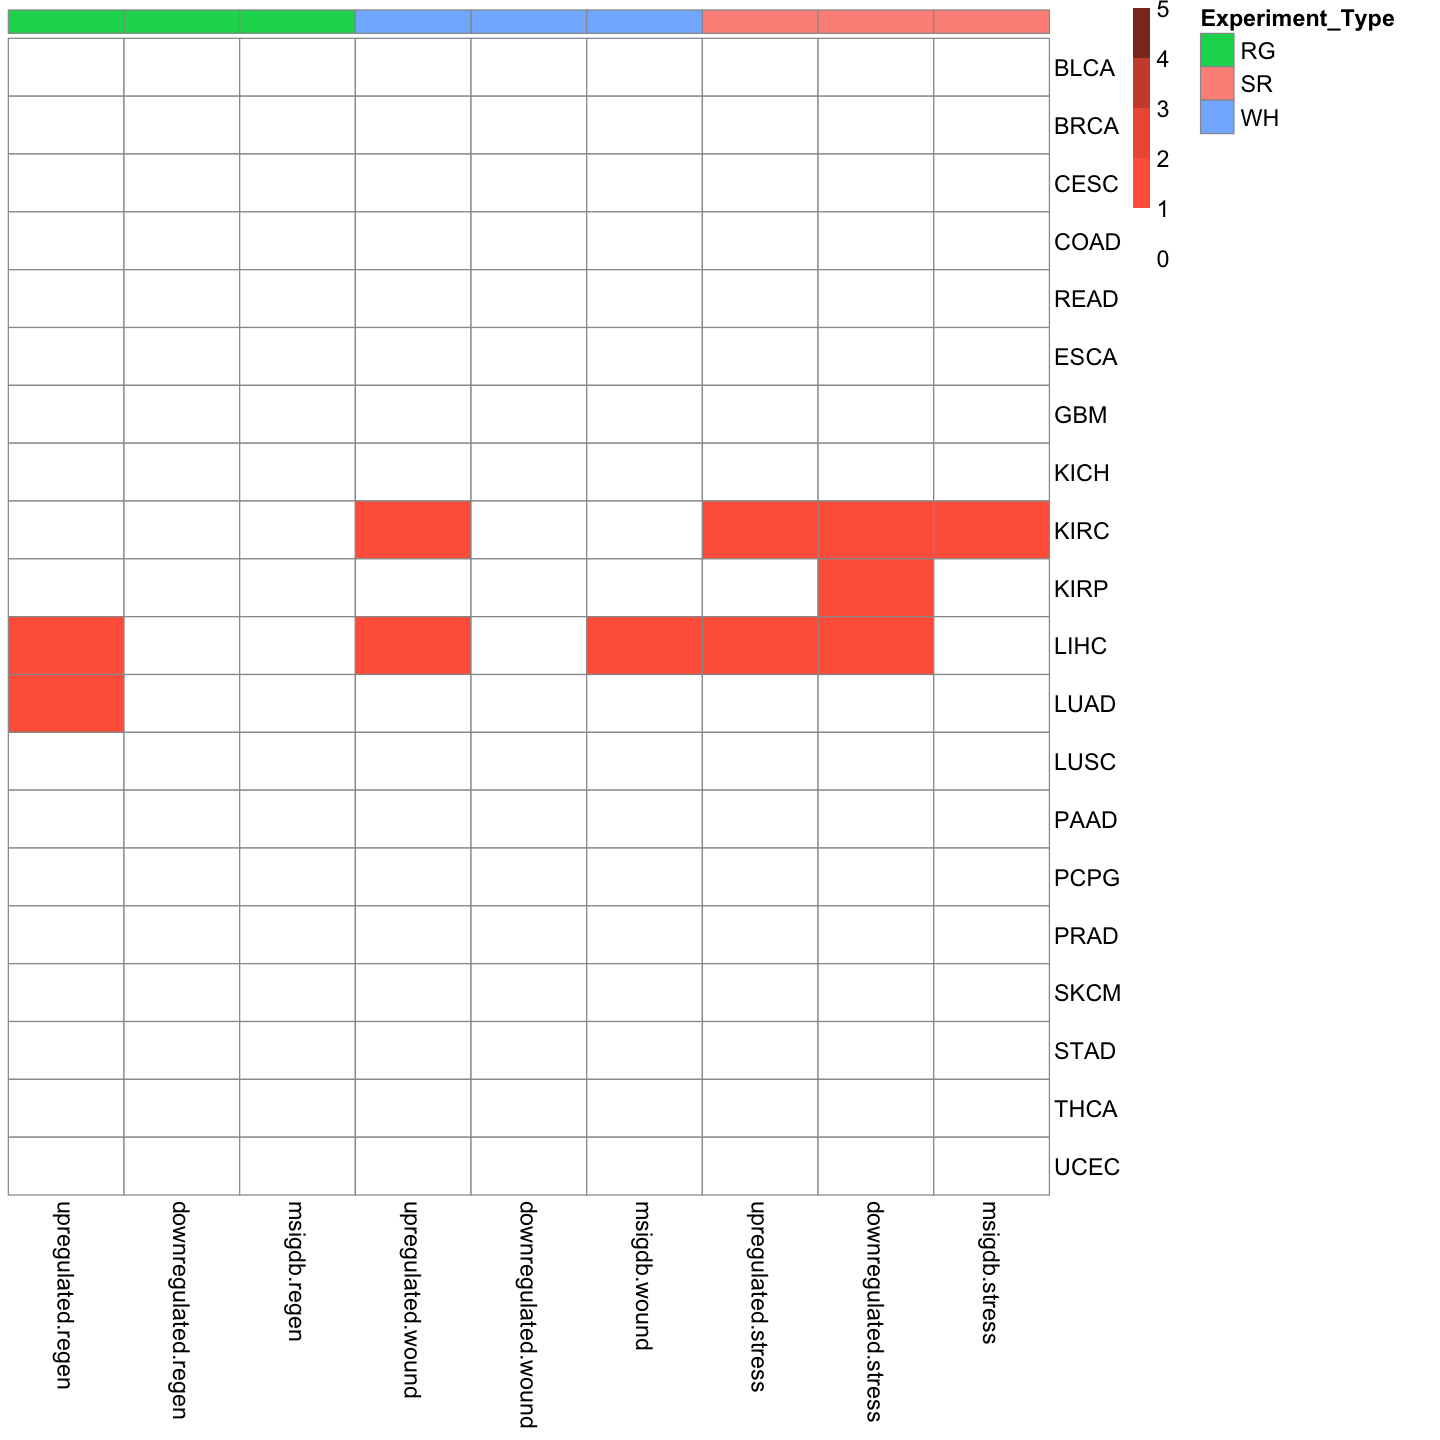

In [12]:
options(repr.plot.width=12, repr.plot.height=12)

pheatmap(neg_matrix[,c('upregulated.regen','downregulated.regen', 'msigdb.regen',
                       'upregulated.wound','downregulated.wound','msigdb.wound',
                       'upregulated.stress','downregulated.stress','msigdb.stress')],
         annotation_col=heatmap_annot_hr, annotation_names_col = F,
         color = colorRampPalette(c("white",'tomato1',"tomato2", "tomato3", "tomato4"))(5),
         fontsize = 14,
         breaks = c(0, 1, 2, 3, 4, 5),cluster_rows=F, cluster_cols=F)

In [13]:
predicted_scores_list <- list()
predicted_scores_list[["High_NonCancer"]] <- fread("../ppi_analysis/extra_files/high_non_cancer.txt", header=F)$V1
predicted_scores_list[["Goldset_Ccancer"]] <- fread("../ppi_analysis/extra_files/goldset_cancer.txt", header=F)$V1
predicted_scores_list[["Low_NonCancer"]] <- fread("../ppi_analysis/extra_files/low_non_cancer.txt", header=F)$V1

In [14]:
predicted_scores_df<- data.frame(fread("../ppi_analysis/extra_files/predicted_sccores_df.csv")[-c(1)])
colnames(predicted_scores_df) <- c("gene_names","score", "driver_status")
rownames(predicted_scores_df)<- predicted_scores_df$gene_names
head(predicted_scores_df)

,gene_names,score,driver_status
,<chr>,<dbl>,<int>
ARF5,ARF5,0.04785405,0
CALM2,CALM2,0.11860910,0
ARHGEF9,ARHGEF9,0.02703926,0
ERN1,ERN1,0.19531144,0
CDKN2A,CDKN2A,0.48706778,1
P4HB,P4HB,0.29649908,0


In [15]:
regression_function <- function(driver_scores, deg_list, y_value_list){
    
    
    deg_status <- 1*(driver_scores$gene_names %in% deg_list)
    regression_df  <- data.frame(driver_scores, deg_status, y_value_list)
    
    fit <- summary(lm(y_value_list ~ score + driver_status + deg_status, regression_df))
    
    return(fit$coefficients[,4])
    
}

In [16]:
get_fraction_dataset <- function(dataset_1, dataset_2){
    
    
    dataset1_names <- names(dataset_1)

    dataset2_names <- names(dataset_2)
    
    # dfs to return
    fractionDF <- data.frame("CTs" = dataset2_names)
    
    for(i in 1:length(dataset_1)) {
        current_vec <- numeric(length = length(dataset_1))
        for(j in 1:length(dataset_2)) {
            
            current_vec[j] <- sum(dataset_1[[i]] %in% dataset_2[[j]])/length(dataset_1[[i]])
            
        }
        fractionDF <- cbind(fractionDF, current_vec) 
    }
    
    final_fractionDF <- fractionDF[,2:length(fractionDF)]
    colnames(final_fractionDF) <- dataset1_names
    rownames(final_fractionDF) <- dataset2_names
    
    return(final_fractionDF)
    
}

In [17]:
combined_recurrent <- predicted_scores_list
pos_matrix <- numeric(length(combined_recurrent))
neg_matrix <- numeric(length(combined_recurrent))
signif_matrix <- numeric(length(combined_recurrent))
exclude_list <- numeric()
current_list <- NULL
regression_pvalue_score <- numeric()
regression_pvalue_driver <- numeric()
regression_pvalue_deg <- numeric()

hr_pos <- list()
for(i in 1:length(survivalList)) {
    no_na <- na.omit(survivalList[[i]])
    sig_dat <- no_na[no_na$HR < 5 & no_na$HR > -5,]
    
    ## subset sig_dat
    if(!(names(survivalList)[i] %in% gsub('TCGA-','',gsub('_.*','',names(total_lfc_cancer_genes))))) {
        exclude_list <- append(exclude_list, i, length(exclude_list))
        next
    }
    deg_index <- which(gsub('TCGA-','',gsub('_.*','',names(total_lfc_cancer_genes))) == names(survivalList)[i])
    #degs <- total_lfc_cancer_genes[[deg_index]][total_lfc_cancer_genes[[deg_index]] %in% combined_recurrent[['High_NonCancer']]]
    #low_degs <- total_lfc_cancer_genes[[deg_index]][total_lfc_cancer_genes[[deg_index]] %in% combined_recurrent[['Low_NonCancer']]]

    
    current_list <- combined_recurrent
    #current_list[["HNC_DEGs"]] <- degs
    #
    
    #current_list[["LNC_DEGs"]] <- low_degs
    
    back_signif_hr <- sig_dat[sig_dat$Pvalue < .05,]
    back_pos_hr <- sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat$HR > 0,]
    back_neg_hr <- sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat < 0,]
    
    ## regression code
    reg_df <- back_pos_hr[rownames(back_pos_hr) %in% predicted_scores_df$gene_names,]
    final_prediction_y <- reg_df[order(rownames(reg_df)),]$HR
    
    if (length(final_prediction_y) < 5) {
        regression_pvalue_score <- append(regression_pvalue_score,NA,length(regression_pvalue_score))
        regression_pvalue_driver <- append(regression_pvalue_driver,NA,length(regression_pvalue_driver))
        regression_pvalue_deg <- append(regression_pvalue_deg,NA,length(regression_pvalue_deg))
    } else {
        current_predicted_scores <- predicted_scores_df[predicted_scores_df$gene_names %in% rownames(back_pos_hr),]
        current_predicted_scores <- current_predicted_scores[order(current_predicted_scores$gene_names),]


        pvals <- regression_function(current_predicted_scores, total_lfc_cancer_genes[[deg_index]], final_prediction_y)

        regression_pvalue_score <- append(regression_pvalue_score,pvals["score"],length(regression_pvalue_score))
        regression_pvalue_driver <- append(regression_pvalue_driver,pvals["driver_status"],length(regression_pvalue_driver))
        regression_pvalue_deg <- append(regression_pvalue_deg,pvals["deg_status"],length(regression_pvalue_deg))
    }
    
    
    ## end regression code
    
    pos_fisher_vec <- numeric(length(current_list))
    neg_fisher_vec <- numeric(length(current_list))
    signif_fisher_vec <- numeric(length(current_list))
    for(j in 1:length(current_list)){
        current_set <- current_list[[j]]
        current_name <- names(current_list)[j]
        current_foreground_total <- sig_dat[rownames(sig_dat) %in% current_set,]
        
        
        fore_signif_hr <- current_foreground_total[current_foreground_total$Pvalue < .05,]
        fore_pos_hr <- current_foreground_total[current_foreground_total$Pvalue < .05 &
                                                current_foreground_total$HR > 0,]
        fore_neg_hr <- current_foreground_total[current_foreground_total$Pvalue < .05 &
                                                current_foreground_total$HR < 0,]
        
        pos_fisher_contingency = rbind(c(nrow(fore_pos_hr),nrow(current_foreground_total)-nrow(fore_pos_hr)),
                                       c(nrow(back_pos_hr),nrow(sig_dat)-nrow(back_pos_hr)))
        neg_fisher_contingency = rbind(c(nrow(fore_neg_hr),nrow(current_foreground_total)-nrow(fore_neg_hr)),
                                       c(nrow(back_neg_hr),nrow(sig_dat)-nrow(back_neg_hr)))
        significant_fisher_contingency = rbind(c(nrow(fore_signif_hr),nrow(current_foreground_total)-nrow(fore_signif_hr)),
                                               c(nrow(back_signif_hr),nrow(sig_dat)-nrow(back_signif_hr)))
        
        pos_test <- fisher.test(pos_fisher_contingency)
        neg_test <- fisher.test(neg_fisher_contingency)
        significant_test <- fisher.test(significant_fisher_contingency)
        
        
        if(pos_test$p.value < .05) {
            pos_fisher_vec[j] = pos_test$estimate
        } else { pos_fisher_vec[j] = -1}
        if(neg_test$p.value < .05) {
            neg_fisher_vec[j] = neg_test$estimate
        } else { neg_fisher_vec[j] = -1}
        if(significant_test$p.value < .05) {
            signif_fisher_vec[j] = significant_test$estimate
        } else { signif_fisher_vec[j] = -1}
    }
    
    pos_matrix <- cbind(pos_matrix, pos_fisher_vec)
    neg_matrix <- cbind(neg_matrix, neg_fisher_vec)
    signif_matrix <- cbind(signif_matrix, signif_fisher_vec)
    
}

pos_matrix <- pos_matrix[,2:ncol(pos_matrix)]
colnames(pos_matrix) <- names(survivalList)[-exclude_list]
rownames(pos_matrix) <- names(current_list)
pos_matrix <- t(pos_matrix)

neg_matrix <- neg_matrix[,2:ncol(neg_matrix)]
colnames(neg_matrix) <- names(survivalList)[-exclude_list]
rownames(neg_matrix) <- names(current_list)
neg_matrix <- t(neg_matrix)

signif_matrix <- signif_matrix[,2:ncol(signif_matrix)]
colnames(signif_matrix) <- names(survivalList)[-exclude_list]
rownames(signif_matrix) <- names(current_list)
signif_matrix <- t(signif_matrix)

regression_pvalues_HR <- data.frame("prediction_score" = regression_pvalue_score,
                                 "driver_status" = regression_pvalue_driver,
                                 "deg_status" = regression_pvalue_deg)
rownames(regression_pvalues_HR) <- names(survivalList)[-exclude_list]

In [18]:
hr_signif <- list()
hr_pos <- list()
hr_neg <- list()
for(i in 1:length(survivalList)) {
    no_na <- na.omit(survivalList[[i]])
    sig_dat <- no_na[no_na$HR < 5 & no_na$HR > -5,]
    hr_signif[[names(survivalList)[i]]] <- rownames(sig_dat[sig_dat$Pvalue < .05,])
    hr_pos[[names(survivalList)[i]]] <- rownames(sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat$HR > 0,])
    hr_neg[[names(survivalList)[i]]] <- rownames(sig_dat[sig_dat$Pvalue < .05 &
                           sig_dat < 0,])
    
}

In [57]:
deg_fraction_df

,High_NonCancer,Goldset_Ccancer,Low_NonCancer
,<dbl>,<dbl>,<dbl>
BLCA,0.0207219251,0.03535354,0.0114220445
BRCA,0.0006684492,0.00000000,0.0008566533
CESC,0.0160427807,0.01010101,0.0062821245
COAD,0.0003342246,0.00000000,0.0000000000
READ,0.0000000000,0.00000000,0.0000000000
ESCA,0.0000000000,0.00000000,0.0000000000
GBM,0.0003342246,0.00000000,0.0000000000
KICH,0.0000000000,0.00000000,0.0000000000
KIRC,0.2663770053,0.21717172,0.2158766419


,Goldset.vs.High,Goldset.vs.Low,High.vs.Low
,<dbl>,<dbl>,<dbl>
BLCA,0.9066667,0.5830836,0.6431069
BRCA,7.5555556,4.4217172,0.5852273
CESC,1.8888889,1.8423822,0.9753788
COAD,NaN,NaN,NaN
READ,NaN,NaN,NaN
ESCA,NaN,NaN,NaN
GBM,0.0000000,NaN,Inf
KICH,NaN,NaN,NaN
KIRC,1.4312286,1.3437020,0.9388452


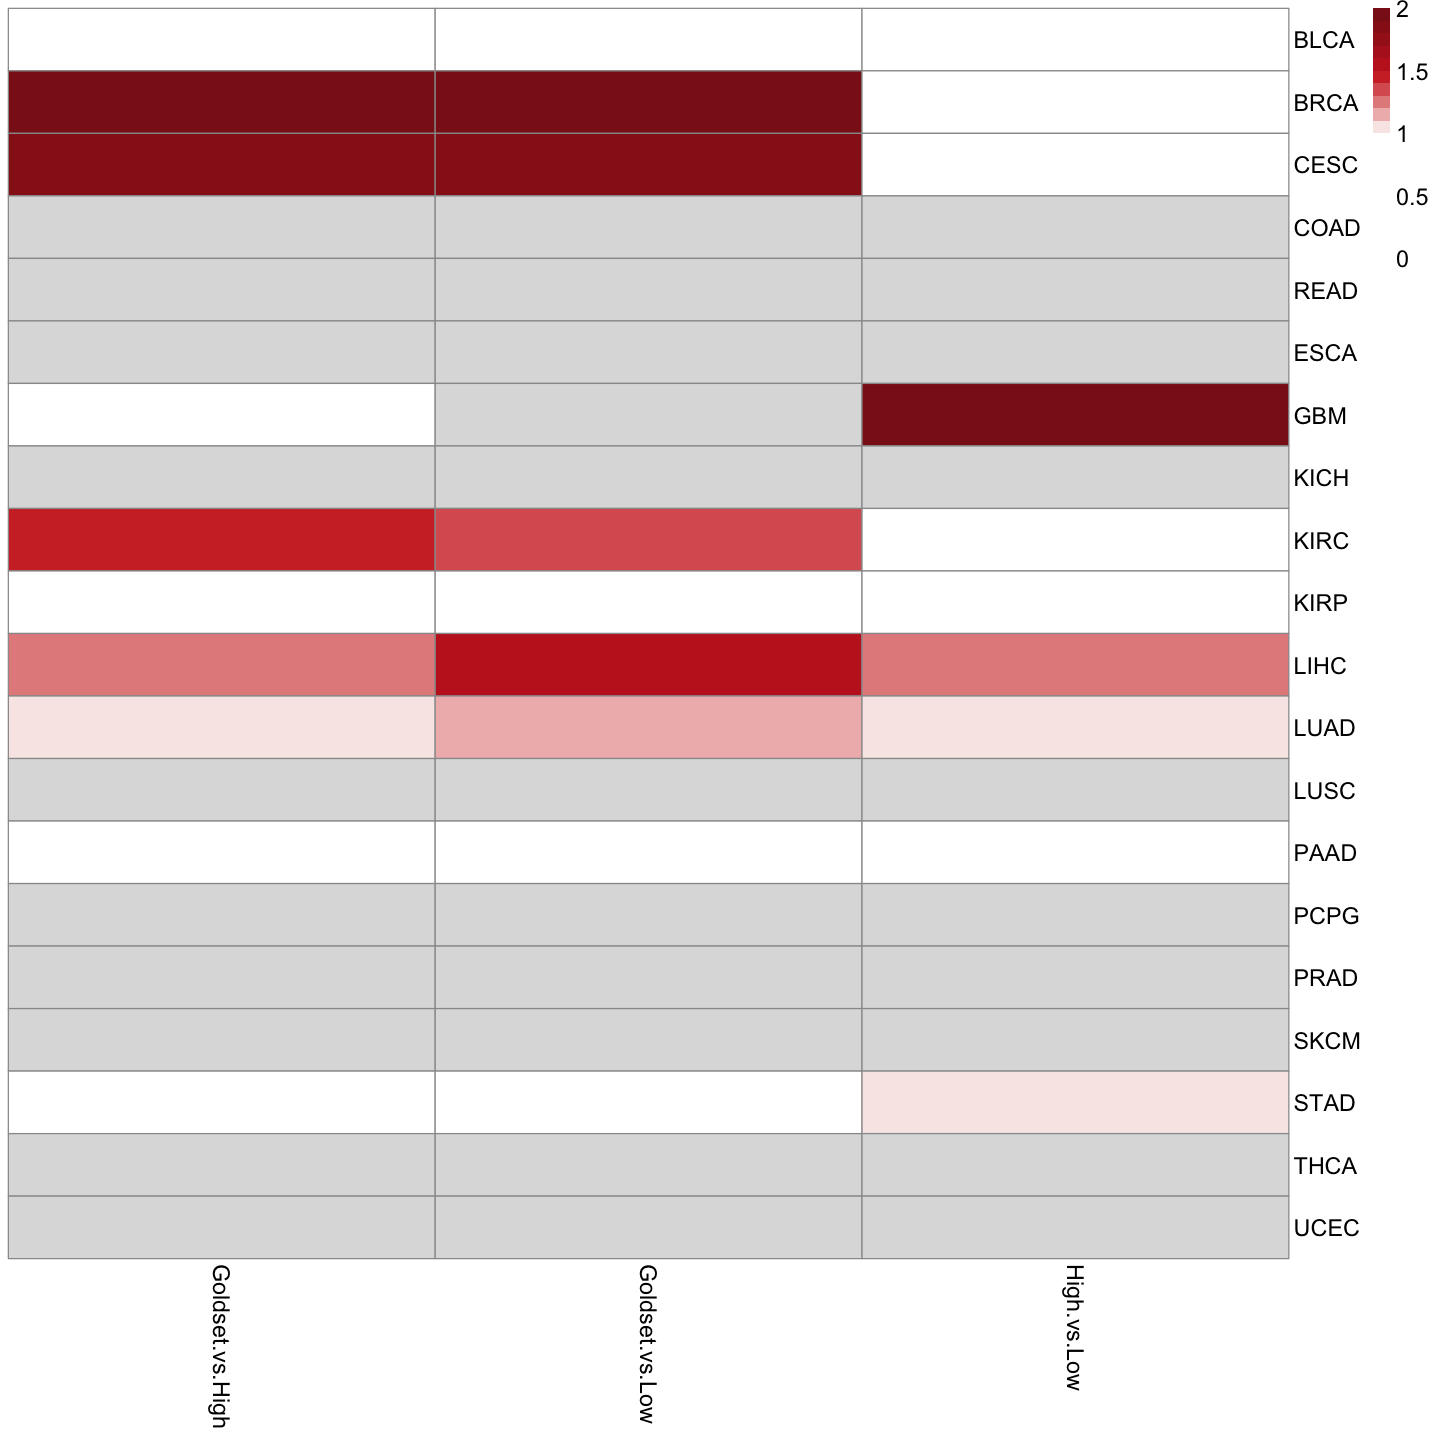

In [64]:
deg_fraction_df <- get_fraction_dataset(predicted_scores_list, hr_neg)
fraction_ratioDF <- data.frame("Goldset vs High" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$High_NonCancer,
                               "Goldset vs Low" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$Low_NonCancer,
                               "High vs Low" = deg_fraction_df$High_NonCancer/deg_fraction_df$Low_NonCancer)
rownames(fraction_ratioDF) <- rownames(deg_fraction_df)
fraction_ratioDF
pheatmap(fraction_ratioDF, cluster_rows=F, cluster_cols=F,
         color = colorRampPalette(c('white',"white", "white", "firebrick3", "firebrick4"))(20),
         fontsize = 14,
         breaks = seq(0,2,.1))

In [63]:
get_fraction_dataset(predicted_scores_list, hr_neg)

,High_NonCancer,Goldset_Ccancer,Low_NonCancer
,<dbl>,<dbl>,<dbl>
BLCA,0.0167112299,0.015151515,0.0259851513
BRCA,0.0003342246,0.002525253,0.0005711022
CESC,0.0066844920,0.012626263,0.0068532267
COAD,0.0000000000,0.000000000,0.0000000000
READ,0.0000000000,0.000000000,0.0000000000
ESCA,0.0000000000,0.000000000,0.0000000000
GBM,0.0003342246,0.000000000,0.0000000000
KICH,0.0000000000,0.000000000,0.0000000000
KIRC,0.2276069519,0.325757576,0.2424328955


,Goldset.vs.High,Goldset.vs.Low,High.vs.Low
,<dbl>,<dbl>,<dbl>
BLCA,0.9066667,0.5830836,0.6431069
BRCA,7.5555556,4.4217172,0.5852273
CESC,1.8888889,1.8423822,0.9753788
COAD,NaN,NaN,NaN
READ,NaN,NaN,NaN
ESCA,NaN,NaN,NaN
GBM,0.0000000,NaN,Inf
KICH,NaN,NaN,NaN
KIRC,1.4312286,1.3437020,0.9388452


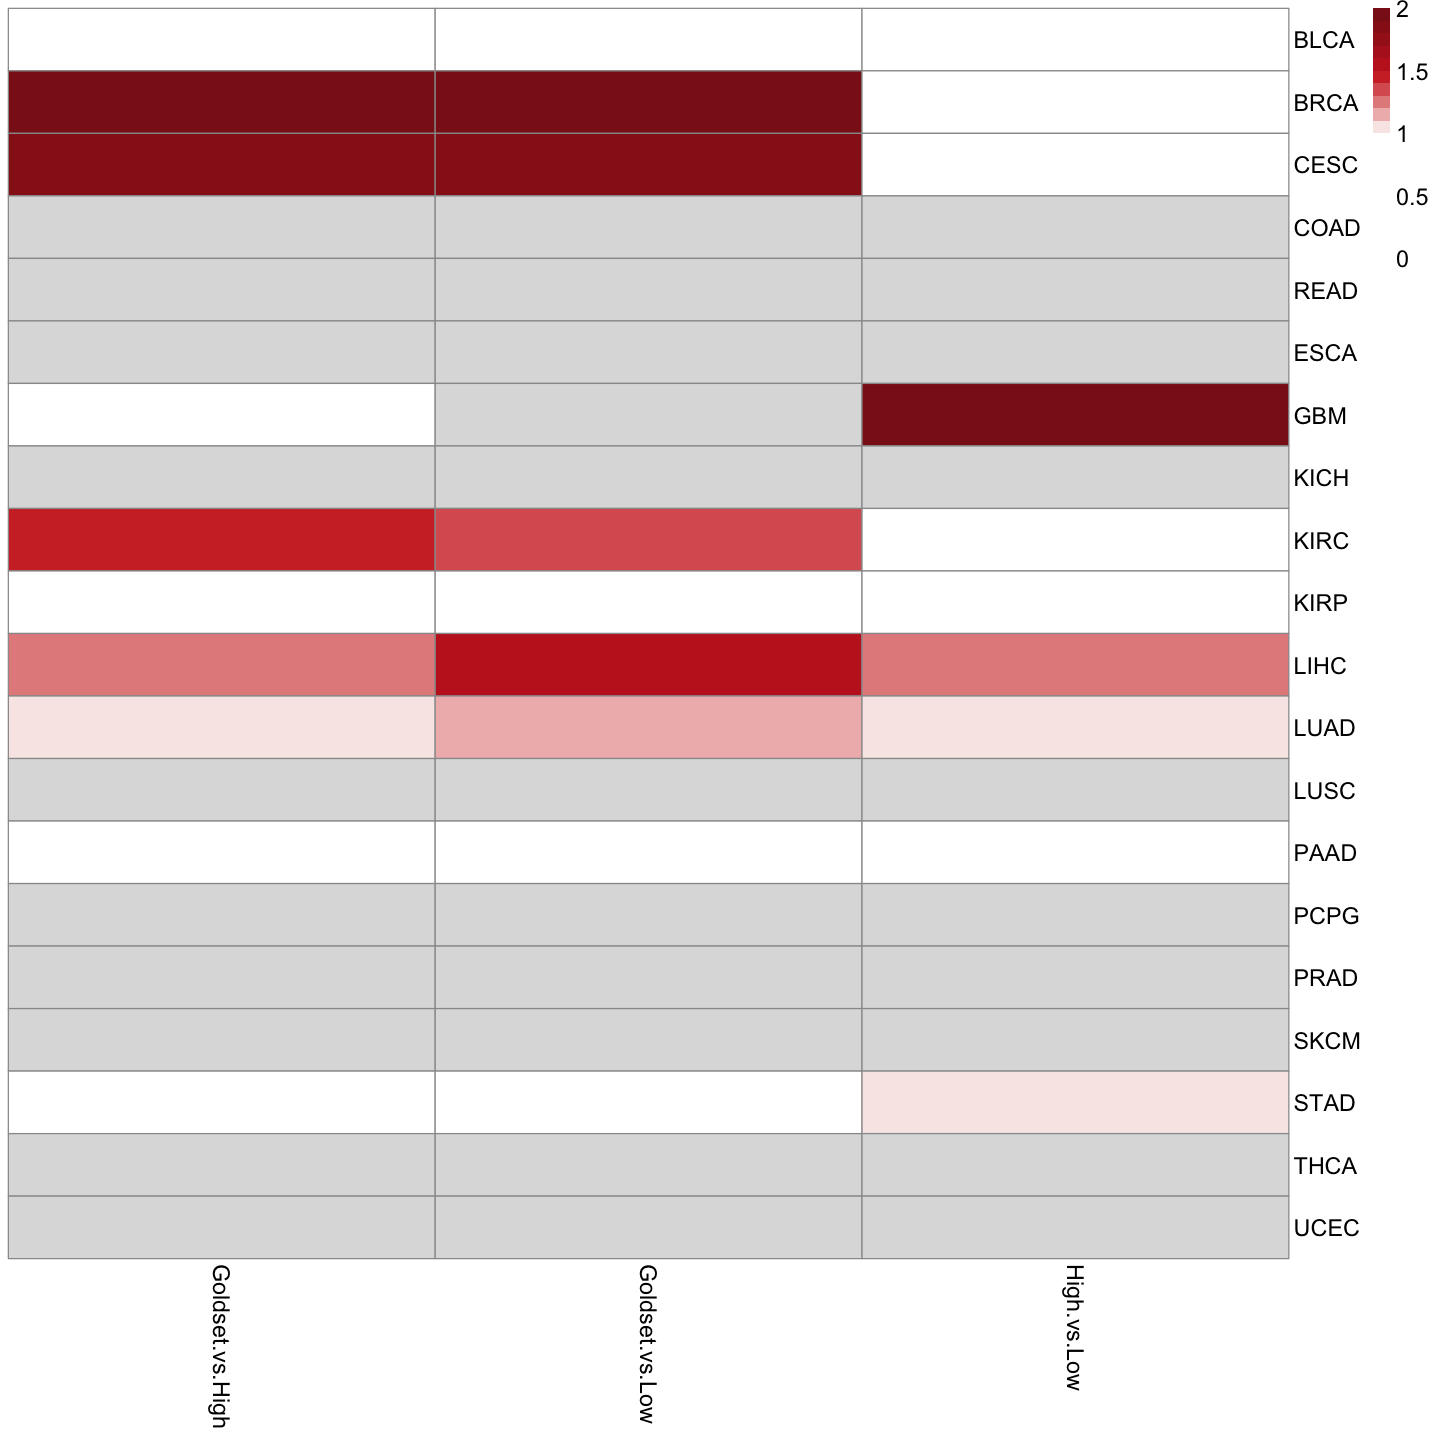

In [60]:
deg_fraction_df_neg <- get_fraction_dataset(predicted_scores_list, hr_neg)
fraction_ratioDF_neg <- data.frame("Goldset vs High" = deg_fraction_df_neg$Goldset_Ccancer/deg_fraction_df_neg$High_NonCancer,
                               "Goldset vs Low" = deg_fraction_df_neg$Goldset_Ccancer/deg_fraction_df_neg$Low_NonCancer,
                               "High vs Low" = deg_fraction_df_neg$High_NonCancer/deg_fraction_df_neg$Low_NonCancer)
rownames(fraction_ratioDF_neg) <- rownames(deg_fraction_df_neg)
fraction_ratioDF_neg
pheatmap(fraction_ratioDF_neg, cluster_rows=F, cluster_cols=F,
         color = colorRampPalette(c('white',"white", "white", "firebrick3", "firebrick4"))(20),
         fontsize = 14,
         breaks = seq(0,2,.1))

Warning message:
“Removed 17 rows containing non-finite values (`stat_boxplot()`).”


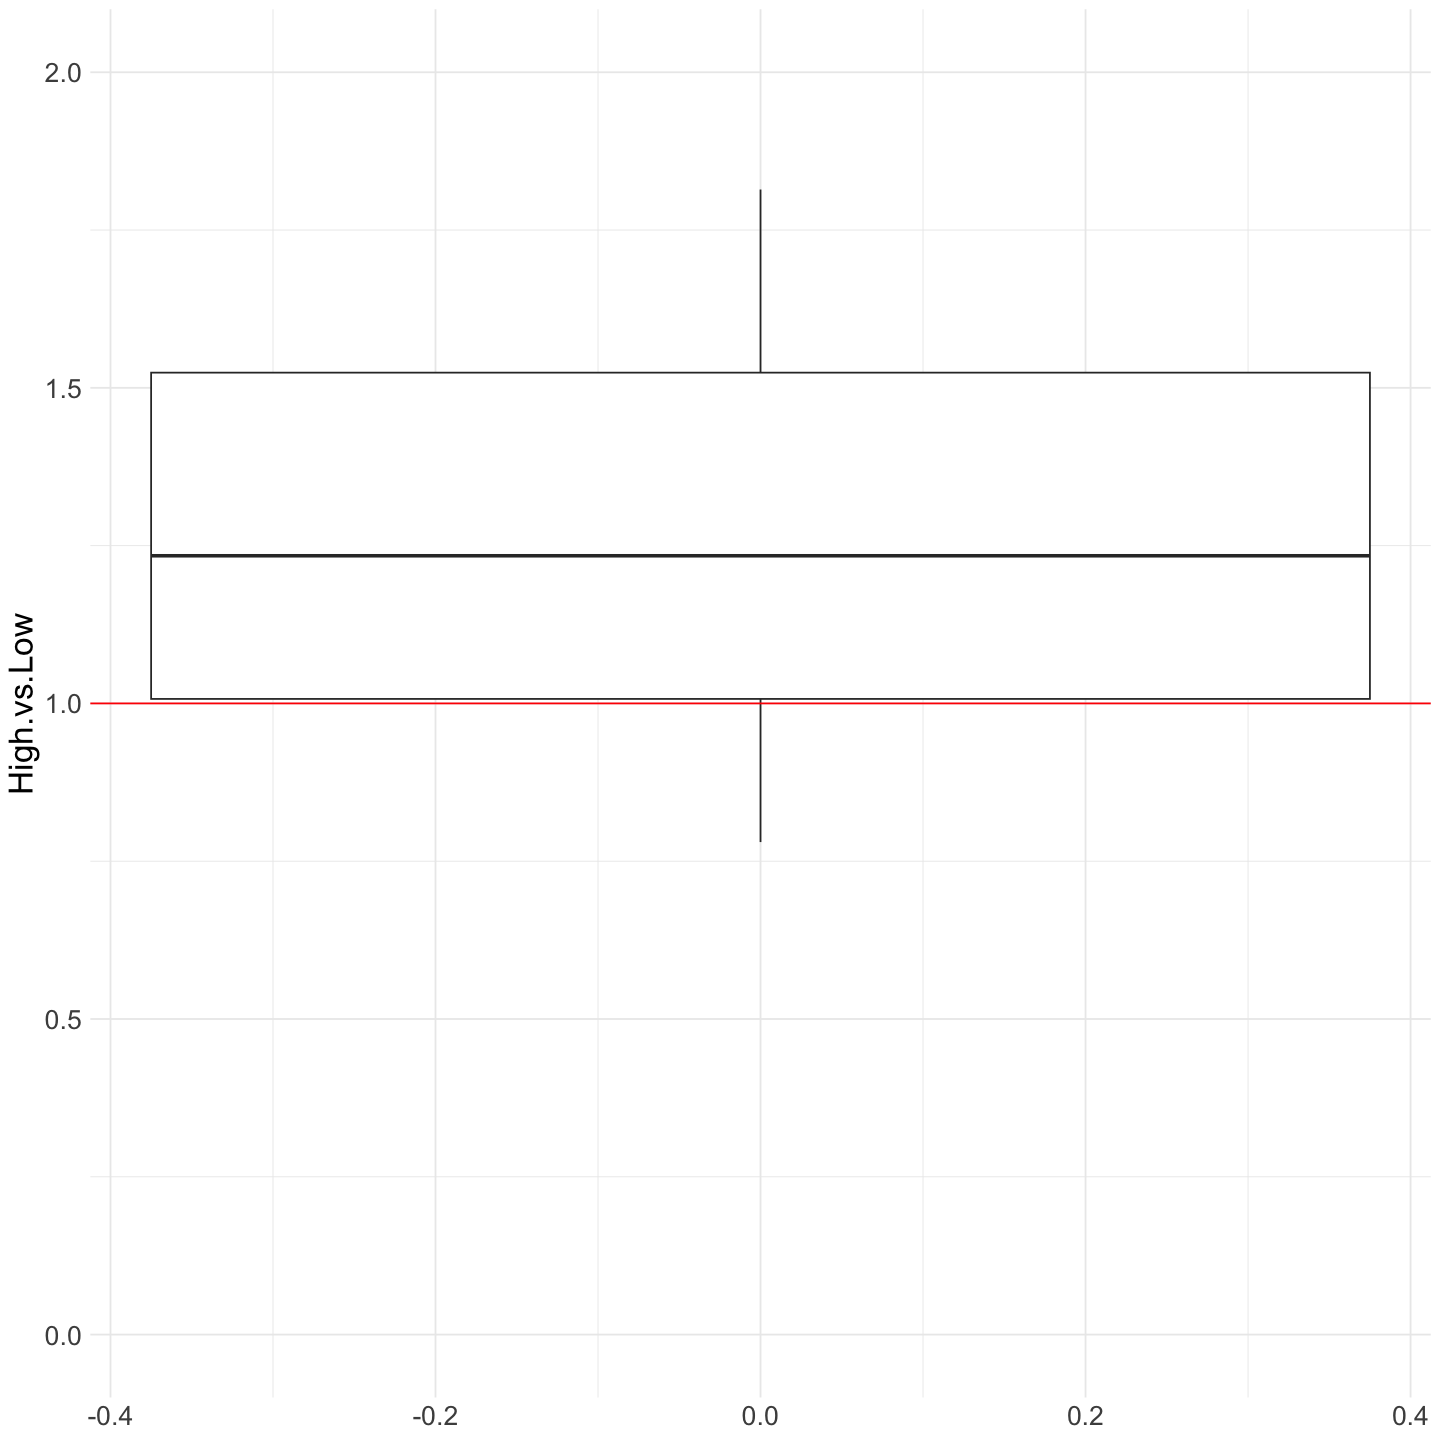

In [20]:
ggplot(fraction_ratioDF, aes(y=High.vs.Low)) +  # This is the plot function
  geom_boxplot(outlier.shape = NA)  +
  scale_y_continuous(limits=c(0,2)) +
  geom_hline(aes(yintercept=1), colour="red") +
theme_minimal() +
    theme(text = element_text(size=20))

No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
“Removed 37 rows containing non-finite values (`stat_boxplot()`).”


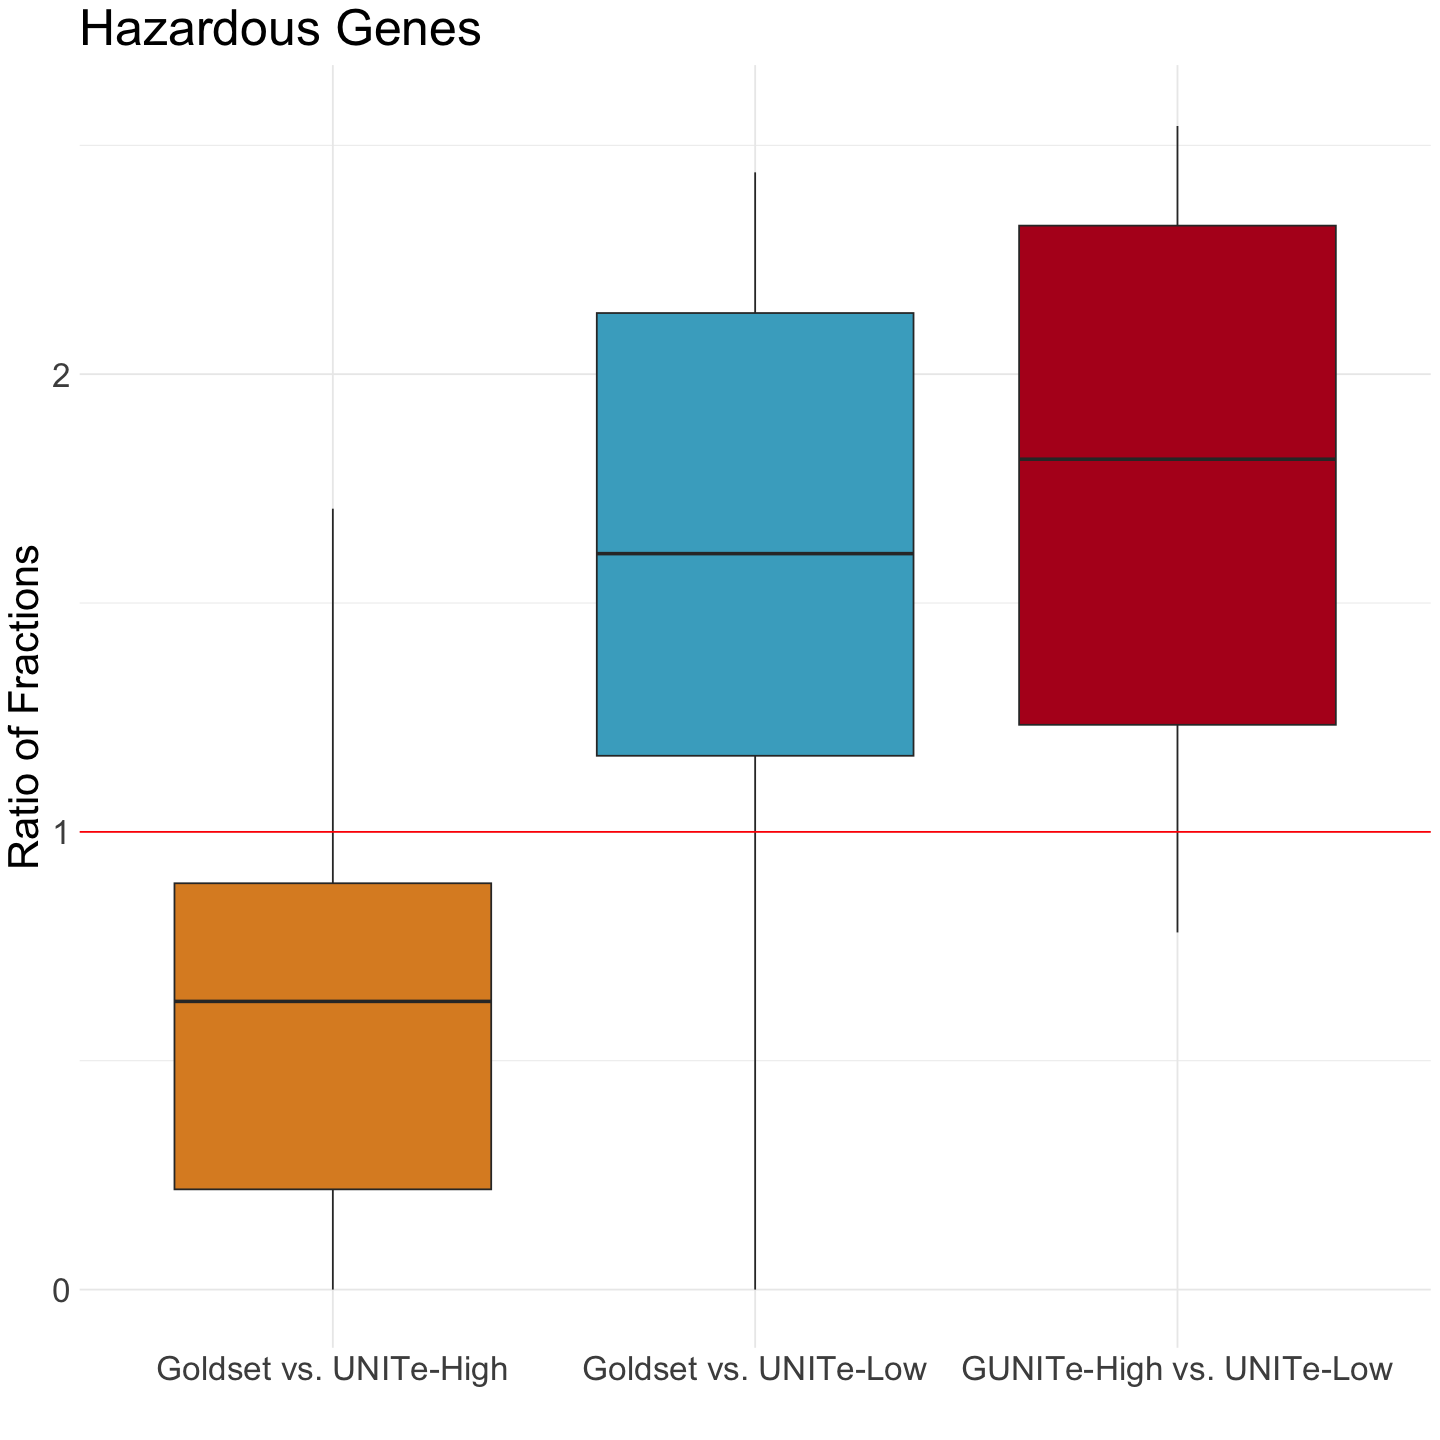

In [55]:
library("wesanderson")
ggplot(reshape2::melt(fraction_ratioDF), aes(y=value,x=variable, fill= variable)) +  # This is the plot function
  geom_boxplot()  +
  scale_y_continuous(limits=c(0,summary(reshape2::melt(fraction_ratioDF)$value)[5])) +
  geom_hline(aes(yintercept=1), colour="red") +
theme_minimal() +
scale_fill_manual(values = wes_palette("FantasticFox1", n = 3,type = "continuous"),
                    name = "Categories")+ 
    theme(text = element_text(size=25),
          legend.position="none") +
scale_x_discrete(labels=c("Goldset vs. UNITe-High",
                          "Goldset vs. UNITe-Low",
                          "GUNITe-High vs. UNITe-Low"))+
labs(title="Hazardous Genes",x="", y = "Ratio of Fractions")

No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
“Removed 38 rows containing non-finite values (`stat_boxplot()`).”


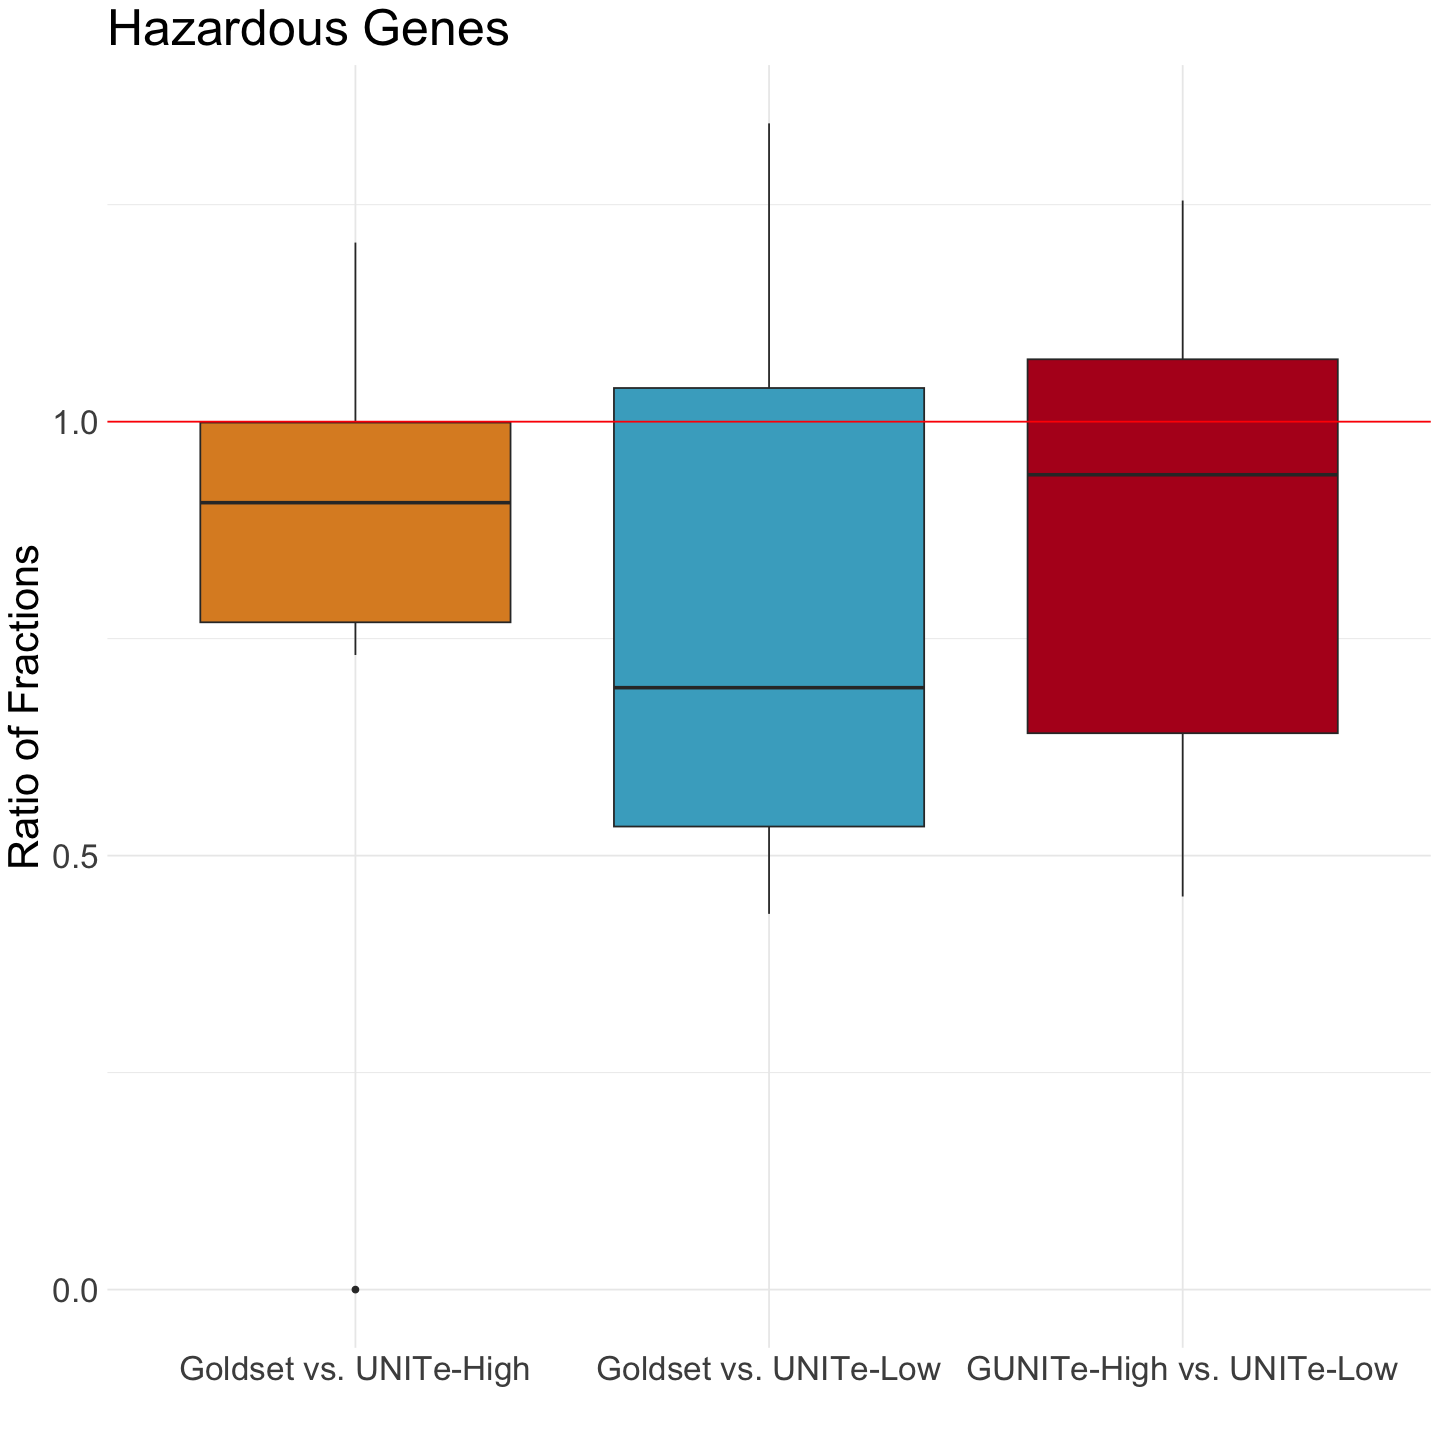

In [62]:
library("wesanderson")
ggplot(reshape2::melt(fraction_ratioDF_neg), aes(y=value,x=variable, fill= variable)) +  # This is the plot function
  geom_boxplot()  +
  scale_y_continuous(limits=c(0,summary(reshape2::melt(fraction_ratioDF_neg)$value)[5])) +
  geom_hline(aes(yintercept=1), colour="red") +
theme_minimal() +
scale_fill_manual(values = wes_palette("FantasticFox1", n = 3,type = "continuous"),
                    name = "Categories")+ 
    theme(text = element_text(size=25),
          legend.position="none") +
scale_x_discrete(labels=c("Goldset vs. UNITe-High",
                          "Goldset vs. UNITe-Low",
                          "UNITe-High vs. UNITe-Low"))+
labs(title="Hazardous Genes",x="", y = "Ratio of Fractions")

In [45]:
fwrite(fraction_ratioDF, paste0("~/conserved_links_homeostasis_oncogenesis/data/", "fractionsDF_hr.txt"))

In [58]:
flattened_comparisons <-reshape2::melt(reshape2::melt(fraction_ratioDF))
unique(flattened_comparisons$variable)

No id variables; using all as measure variables

Using variable as id variables



[1] Goldset.vs.High Goldset.vs.Low  High.vs.Low    
Levels: Goldset.vs.High Goldset.vs.Low High.vs.Low

In [59]:
gs_hr_frac <- flattened_comparisons[flattened_comparisons$variable == "Goldset.vs.High",]$value
high_hr_frac <- flattened_comparisons[flattened_comparisons$variable == "High.vs.Low",]$value
saveRDS(gs_hr_frac, "../data/gs_high_hrFrac.RDS")
saveRDS(high_hr_frac, "../data/high_low_hrFrac.RDS")